sampling_period 0.01
sample_number 200.0


C:\Users\olahurikar\AppData\Local\Continuum\Anaconda3\envs\fusion\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\olahurikar\AppData\Local\Continuum\Anaconda3\envs\fusion\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


<IPython.core.display.Javascript object>


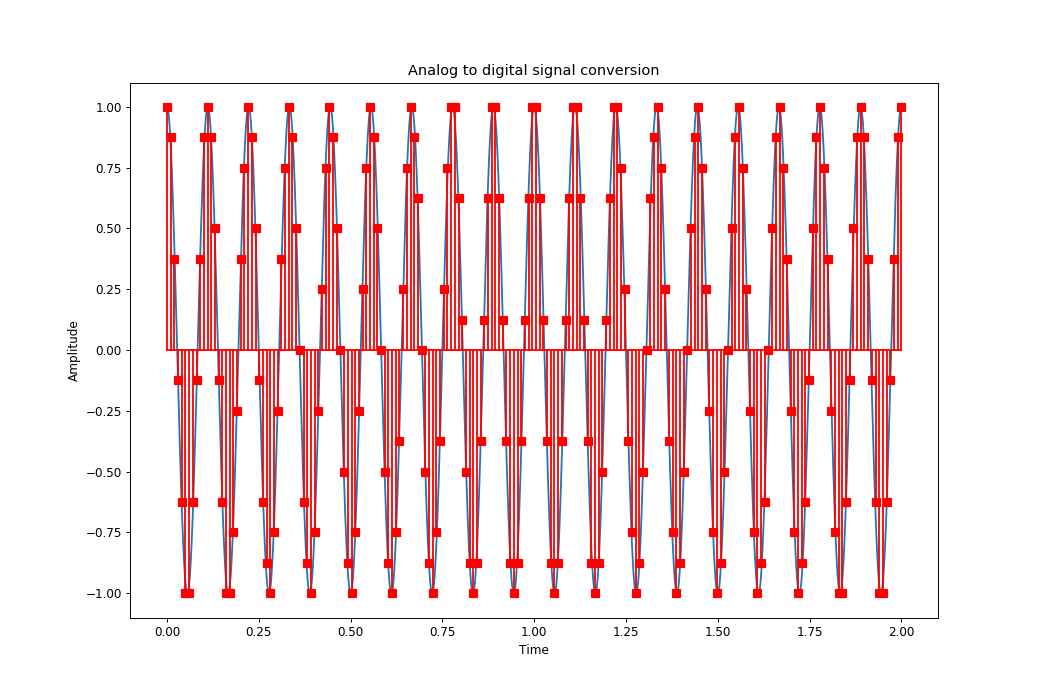

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# Analog Sig Info
time_of_view        = 2.; # s.
analog_time         = np.linspace (0, time_of_view, 10e5); # s.

sampling_rate       = 100; # Hz
sampling_period     = 1. / sampling_rate; # s
print('sampling_period', sampling_period)
sample_number       = time_of_view / sampling_period;
print('sample_number', sample_number)
sampling_time       = np.linspace (0, time_of_view, sample_number);
# -------------------------------------
carrier_frequency   = 9.;
amplitude           = 1;
phase               = 0;
# Quantization
quantizing_bits     = 4; # 
quantizing_levels   = 2 ** quantizing_bits / 2;
quantizing_step     = 1. / quantizing_levels;

def analog_signal (time_point):
    return amplitude * np.cos (2 * np.pi * carrier_frequency * time_point + phase);
sampling_signal     = analog_signal (sampling_time);
# Quantization 
quantizing_signal   = np.round (sampling_signal / quantizing_step) * quantizing_step;


fig = plt.figure (figsize=(12,8), dpi=80)
plt.plot (analog_time,   analog_signal (analog_time) );
#plt.stem (sampling_time, sampling_signal);
plt.stem (sampling_time, quantizing_signal, linefmt='r-', markerfmt='rs', basefmt='r-');
plt.title("Analog to digital signal conversion")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.show()

<IPython.core.display.Javascript object>


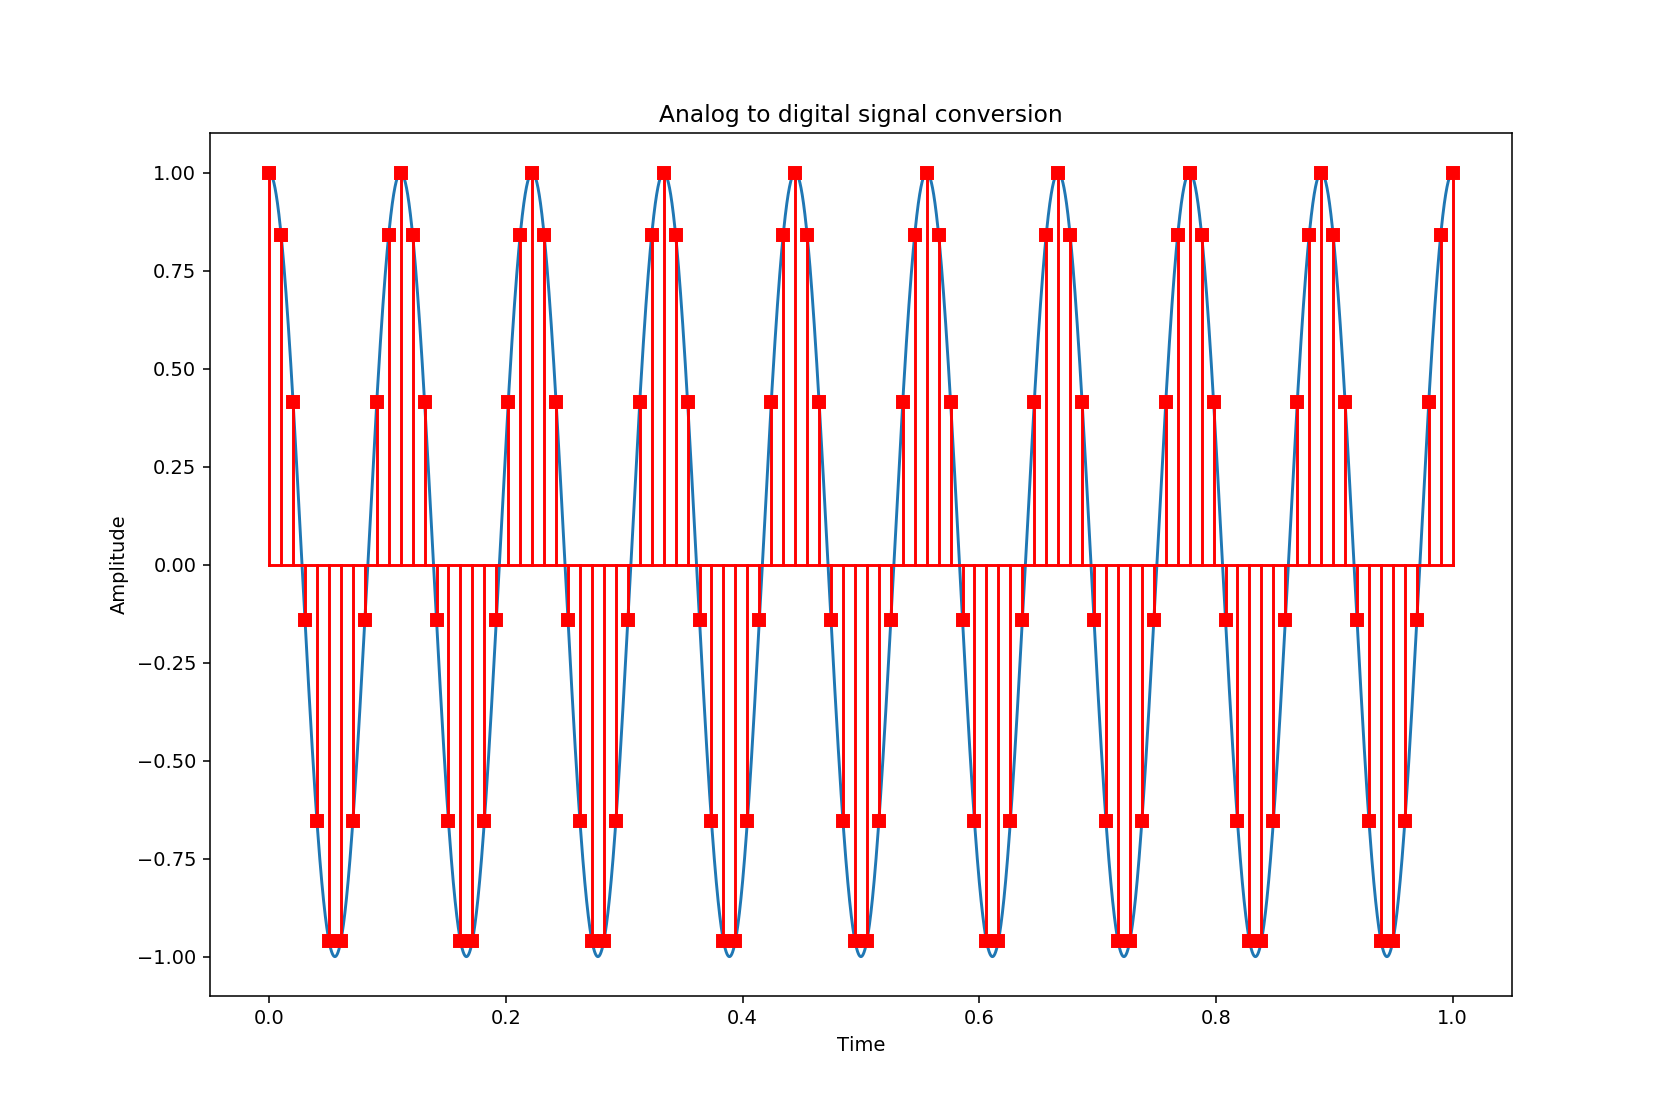

In [11]:
from scipy import signal
f = signal.resample(sampling_signal, sampling_rate)

fig = plt.figure (figsize=(12,8), dpi=80)
plt.plot (analog_time,   analog_signal (analog_time) );
#plt.stem (sampling_time, sampling_signal);
plt.stem (sampling_time, f, linefmt='r-', markerfmt='rs', basefmt='r-');
plt.title("Analog to digital signal conversion")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.show()